Home Sales Data Details in Istanbul

src : https://www.kaggle.com/datasets/emrahaydemr/home-sales-data-details-in-istanbul/data

column :179

In [43]:
!pip install pip==23.2.1 setuptools==65.5.1

In [44]:
!pip install deap  pyswarm pywhale xgboost matplotlib lightgbm catboost imbalanced-learn

In [45]:
# connect S3 bucket
bucket = "mscproject01"
datakey = "Home Sale Data.csv"
data_location = f"s3://{bucket}/{datakey}"

print(data_location)

s3://mscproject01/Home Sale Data.csv


In [46]:
# import the library

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
import time

In [47]:
# Load dataset
df = pd.read_csv(data_location, delimiter=';')
df.head(5)

District            Neighborhood        Price Adrtisement Date  \
0         Tuzla             Aydƒ±nlƒ± Mh.   165.000 TL       04.01.2020   
1         Fatih         Katip Kasƒ±m Mh.   207.000 TL       06.01.2020   
2      √áekmek√∂y           √áatalme≈üe Mh.   153.000 TL       31.12.2019   
3      √áekmek√∂y  Mehmet Akif Ersoy Mah.   205.000 TL       29.12.2019   
4  K√º√ß√ºk√ßekmece      Halkalƒ± Merkez Mh.   150.000 TL       01.01.2020   

   m¬≤ (Gross)  m¬≤ (Net) Number of rooms       Building Age Floor location  \
0          50      40.0             1+1       5-10 between              5   
1          42      42.0             1+1  31  and more than   Ground floor   
2          55      45.0             1+1                  1          Kot 1   
3          62      46.0             1+1                  0  High entrance   
4          70      55.0             1+1       5-10 between   Garden Floor   

  Number of floors              Heating Number of bathrooms Balcony Furnished  \
0               13  Natural Gas (Combi)                   1  Absent       Yes   
1                3        Floor Heating                   1  Absent        No   
2                7  Natural Gas (Combi)                   1  Absent        No   
3                5  Natural Gas (Combi)                   1  Absent        No   
4                4  Natural Gas (Combi)                   1  Absent        No   

     Using status Available for Loan    From who Swap  Front West  Front East  \
0            Free                Yes  From owner   No           0           0   
1            Free                Yes   From bank   No           0           0   
2  Property owner                Yes  From owner  Yes           0           0   
3  Property owner                Yes  From owner  Yes           0           0   
4  Property owner                Yes  From owner   No           0           0   

   Front South  Front North  ADSL  Wood Joinery  Smart House  Alarm (Thief)  \
0            0            0     0             0            0              0   
1            0            0     0             0            0              0   
2            0            0     0             0            0              0   
3            0            0     0             0            0              0   
4            0            0     0             0            0              0   

   Alarm (Fire)  Alaturka Toilet  Aluminum joinery  American Door  \
0             0                0                 0              0   
1             0                0                 0              0   
2             0                0                 0              0   
3             0                0                 0              0   
4             0                0                 0              0   

   American kitchen  Built-in on  Elevator  Balcony.1  Barbecue  \
0                 0            0         0          0         0   
1                 0            0         0          0         0   
2                 0            0         0          0         0   
3                 0            0         0          0         0   
4                 0            0         0          0         0   

   Household appliances  Painted  Dishwasher  Refrigerator  Wall paper  \
0                     0        0           0             0           0   
1                     0        0           0             0           0   
2                     0        0           0             0           0   
3                     0        0           0             0           0   
4                     0        0           0             0           0   

   Shower  Parents' Bathroom  Fiber Internet  On  Dressing room  Closet  \
0       0                  0               0   0              0       0   
1       0                  0               0   0              0       0   
2       0                  0               0   0              0       0   
3       0                  0               0   0              0       0   
4 

In [48]:
df.shape

(34843, 179)

In [49]:
df.tail()

District             Neighborhood           Price Adrtisement Date  \
34838     Sarƒ±yer              Ayazaƒüa Mh.    5.650.000 TL       02.01.2020   
34839    Bakƒ±rk√∂y  Atak√∂y 2-5-6. Kƒ±sƒ±m Mh.   12.000.000 TL       03.01.2020   
34840     Sarƒ±yer              Maslak Mah.    2.700.000 TL       03.01.2020   
34841       Fatih         ƒ∞skenderpa≈üa Mh.      775.000 TL       28.12.2019   
34842  Beylikd√ºz√º             Marmara Mah.    1.560.000 TL       04.01.2020   

       m¬≤ (Gross)  m¬≤ (Net) Number of rooms Building Age Floor location  \
34838         270     185.0             4+1            0              9   
34839         289     250.0           4.5+1            0              8   
34840         311     310.0             3+1            1             14   
34841         145     121.0             3+1            0              4   
34842         144     111.0             3+1            0              5   

      Number of floors               Heating Number of bathrooms    Balcony  \
34838                9  Center (Share Meter)                   2  Available   
34839               16  Center (Share Meter)                   3  Available   
34840               16  Center (Share Meter)                   2  Available   
34841                7   Natural Gas (Combi)                   2  Available   
34842                6   Natural Gas (Combi)                   2  Available   

      Furnished    Using status Available for Loan  \
34838        No            Free                Yes   
34839       Yes            Free                 No   
34840        No            Free                 No   
34841       Yes  Property owner                Yes   
34842        No            Free                Yes   

                          From who Swap  Front West  Front East  Front South  \
34838  From the real estate office   No           1           1            1   
34839  From the real estate office   No           1           1            1   
34840  From the real estate office   No           1           1            1   
34841                   From owner  Yes           1           1            1   
34842  From the real estate office   No           1           1            1   

       Front North  ADSL  Wood Joinery  Smart House  Alarm (Thief)  \
34838            1     1             1            1              1   
34839            1     1             1            1              1   
34840            1     1             1            1              1   
34841            1     1             1            1              1   
34842            1     1             0            1              1   

       Alarm (Fire)  Alaturka Toilet  Aluminum joinery  American Door  \
34838             1                1                 1              1   
34839             1                1                 1              1   
34840             1                1                 1              1   
34841             1                1                 1              1   
34842             1                1                 1              1   

       American kitchen  Built-in on  Elevator  Balcony.1  Barbecue  \
34838                 1            1         1          1         1   
34839                 1            1         1          1         1   
34840                 1            1         1          1         1   
34841                 1            1         1          1         1   
34842                 1            1         1          1         0   

       Household appliances  Painted  Dishwasher  Refrigerator  Wall paper  \
34838                     1        1           1             1           1   
34839                     1        1           1             1           1   
34840                     1        1           1             1           1   
34841                     1        1           1             1           1   
34842                     1        1           1             1           1   

       Shower  Parents' Bathroom

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34843 entries, 0 to 34842
Columns: 179 entries, District to Pick Up Data Time
dtypes: float64(1), int64(161), object(17)
memory usage: 47.6+ MB


In [51]:
df.isnull().sum().sort_values(ascending=False).head(20)


m¬≤ (Net)             28
Handle / Railing      0
Toilet                0
Swimming pool         0
The mall              0
municipality          0
Mosque                0
Cemevi                0
Next to sea shore     0
Pharmacy              0
Garage / Shop Top     0
Fair                  0
Hospital              0
Synagogue             0
The church            0
High school           0
Market                0
Park.1                0
Police station        0
The health clinic     0
dtype: int64

In [52]:
# Step 1: Remove duplicate columns (e.g., multiple 'Elevator', 'Balcony')
df = df.loc[:, ~df.columns.duplicated()]

In [53]:
# Step 2: Drop columns with all missing values (if any)
df.dropna(axis=1, how='all', inplace=True)

In [54]:
# Step 2: Drop columns with all missing values (if any)
df.dropna(axis=1, how='all', inplace=True)

In [55]:
# Step 3: Fill missing values (you can customize)
df.fillna("Unknown", inplace=True)

In [56]:
df.shape

(34843, 179)

In [57]:
pd.set_option('display.max_columns', None)
df.columns.tolist()

['District',
 'Neighborhood',
 'Price',
 'Adrtisement Date',
 'm¬≤ (Gross)',
 'm¬≤ (Net)',
 'Number of rooms',
 'Building Age',
 'Floor location',
 'Number of floors',
 'Heating',
 'Number of bathrooms',
 'Balcony',
 'Furnished',
 'Using status',
 'Available for Loan',
 'From who',
 'Swap',
 'Front West',
 'Front East',
 'Front South',
 'Front North',
 'ADSL',
 'Wood Joinery',
 'Smart House',
 'Alarm (Thief)',
 'Alarm (Fire)',
 'Alaturka Toilet',
 'Aluminum joinery',
 'American Door',
 'American kitchen',
 'Built-in on',
 'Elevator',
 'Balcony.1',
 'Barbecue',
 'Household appliances',
 'Painted',
 'Dishwasher',
 'Refrigerator',
 'Wall paper',
 'Shower',
 "Parents' Bathroom",
 'Fiber Internet',
 'On',
 'Dressing room',
 'Closet',
 'Video intercom',
 'Hilton Bathroom',
 'Intercom System',
 'Insulating glass',
 'Jacuzzi',
 'Plasterboard',
 'Cellar',
 'Air conditioning',
 'Tub',
 'Laminate Floor',
 'Marley',
 'Furniture',
 'Kitchen (Built-in)',
 'Kitchen (Laminate)',
 'Kitchen Natural Gas'

In [58]:
# This tells pandas to display all columns without truncation
pd.set_option('display.max_columns', None)

# Now display a specific row ‚Äî for example, the first row
print(df.iloc[0])

District                   Tuzla
Neighborhood         Aydƒ±nlƒ± Mh.
Price                 165.000 TL
Adrtisement Date      04.01.2020
m¬≤ (Gross)                    50
                        ...     
Rerse Duplex                   0
Triplex                        0
Ground floor                   0
Roof Duplex                    0
Pick Up Data Time     01.08.2020
Name: 0, Length: 179, dtype: object


In [59]:
df.sample(1)  # shows 1 random full row


District   Neighborhood        Price Adrtisement Date  m¬≤ (Gross)  \
15048  Sancaktepe  Yenidoƒüan Mh.   200.000 TL       03.01.2020         100   

      m¬≤ (Net) Number of rooms Building Age Floor location Number of floors  \
15048     88.0             2+1            4  High entrance                4   

                   Heating Number of bathrooms Balcony Furnished  \
15048  Natural Gas (Combi)                   2  Absent        No   

         Using status Available for Loan                     From who Swap  \
15048  Property owner                Yes  From the real estate office  Yes   

       Front West  Front East  Front South  Front North  ADSL  Wood Joinery  \
15048           0           0            1            0     1             0   

       Smart House  Alarm (Thief)  Alarm (Fire)  Alaturka Toilet  \
15048            0              0             0                0   

       Aluminum joinery  American Door  American kitchen  Built-in on  \
15048                 0              0                 0            0   

       Elevator  Balcony.1  Barbecue  Household appliances  Painted  \
15048         0          0         0                     0        1   

       Dishwasher  Refrigerator  Wall paper  Shower  Parents' Bathroom  \
15048           1             0           0       1                  0   

       Fiber Internet  On  Dressing room  Closet  Video intercom  \
15048               1   0              0       0               1   

       Hilton Bathroom  Intercom System  Insulating glass  Jacuzzi  \
15048                0                0                 1        0   

       Plasterboard  Cellar  Air conditioning  Tub  Laminate Floor  Marley  \
15048             0       0                 0    0               0       0   

       Furniture  Kitchen (Built-in)  Kitchen (Laminate)  Kitchen Natural Gas  \
15048          0                   0                   0                    0   

       PVC Joinery  Blinds  Parquet Floor  Ceramic Floor  Set Top Cooker  \
15048            0       0              1              1               1   

       Spot Lighting  Terrace  Thermosiphon  Cloakroom  Wi-Fi  \
15048              0        0             0          0      1   

       Face Recognition & Fingerprint  Washing Machine  Washing machine  \
15048                               0                0                1   

       Laundry room  Steel door  Water heater  Fireplace  Elevator.1  \
15048             1           1             0          0           0   

       Steam room  Security  Bath  Booster  Thermal Insulation  Generator  \
15048           0         0     0        0                   1          0   

       Cable TV  Closed Garage  Doorman  Nursery  With Private Pool  Car park  \
15048         1              0        0        0                  0         0   

       Playground  Sauna  Sound insulation  Siding  Sports Area  Water tank  \
15048           0      0                 1       0            0           0   

       Tennis court  Satellite  Fire escape  Swimming Pool (Open)  \
15048             0          1            0                     0   

       Swimming Pool (Indoor)  Parking Lot  Elevator.2  Bathroom  \
15048                       0            0           0         1   

       Wide Corridor  Entrance / Ramp  Stairs  Kitchen  Room door  Park  \
15048              1                1       1        1          1     1   

       Socket / Electric Switch  Handle / Railing  Toilet  Swimming pool  \
15048                         1                 1       1              0   

       The mall  municipality  Mosque  Cemevi  Next to sea shore  Pharmacy  \
15048         1             1       1       0                  0         1   

       Amusement center  Fair  Hospital  Synagogue  The church  High school  \
15048                 1     0         1          0           0            1   

       Market  Park.1  Police station  The health clinic  District Market  \
15048       1       1            

In [60]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()


District                 39
Neighborhood            609
Price                  2050
Adrtisement Date        160
m¬≤ (Net)                301
Number of rooms          32
Building Age             11
Floor location           42
Number of floors         30
Heating                  16
Number of bathrooms       8
Balcony                   3
Furnished                 3
Using status              3
Available for Loan        3
From who                  4
Swap                      2
Pick Up Data Time         4
dtype: int64

In [61]:
df.drop(['Adrtisement Date', 'Pick Up Data Time'], axis=1, inplace=True)

In [62]:
# Remove unwanted characters (like commas, spaces, etc.) and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df['m¬≤ (Net)'] = pd.to_numeric(df['m¬≤ (Net)'].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Optional: Convert other numeric-like columns too
numeric_cols = ['m¬≤ (Gross)', 'Number of rooms', 'Building Age', 'Number of floors', 'Number of bathrooms']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')


In [63]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

District               39
Neighborhood          609
Floor location         42
Heating                16
Balcony                 3
Furnished               3
Using status            3
Available for Loan      3
From who                4
Swap                    2
dtype: int64

In [64]:
df['Floor location'].unique()

array(['5', 'Ground floor', 'Kot 1', 'High entrance', 'Garden Floor', '2',
       '4', '6', '1', 'Entrance floor', '3', 'Basement', 'Kot 2', 'Kot 3',
       '13', '7', '10', '11', 'Kot 4', '9', '27', '25', '12',
       '30  and more than', '15', '8', '20', '14', '16', '22', '19', '23',
       '18', 'Penthouse', 'Villa type', '21', '17', '24', '26', '29',
       'Private', '28'], dtype=object)

In [65]:
floor_location_mapping = {
    'Ground floor': 42,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20,
    '21': 21,
    '22': 22,
    '23': 23,
    '24': 24,
    '25': 25,
    '26': 26,
    '27': 27,
    '28': 28,
    '29': 29,
    '30 and more than': 30,
    'Villa type': 31,
    'High entrance': 32,
    'Entrance floor': 33,
    'Basement': 34,
    'Kot 1': 35,
    'Kot 2': 36,
    'Kot 3': 37,
    'Kot 4': 38,
    'Penthouse': 39,
    'Private': 40,
    'Garden Floor': 41
}

# Replace floor location with mapped values
df['Floor location'] = df['Floor location'].map(floor_location_mapping)

# Fill NaN values with 0 (means unknown/missing)
df['Floor location'] = df['Floor location'].fillna(0).astype(int)

# Confirm changes
print(df['Floor location'].unique())


0     5
1    42
2    35
3    32
4    41
Name: Floor location, dtype: int64


In [66]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

District               39
Neighborhood          609
Heating                16
Balcony                 3
Furnished               3
Using status            3
Available for Loan      3
From who                4
Swap                    2
dtype: int64

In [68]:
df['Floor location'].unique()

array([ 5, 42, 35, 32, 41,  2,  4,  6,  1, 33,  3, 34, 36, 37, 13,  7, 10,
       11, 38,  9, 27, 25, 12,  0, 15,  8, 20, 14, 16, 22, 19, 23, 18, 39,
       31, 21, 17, 24, 26, 29, 40, 28])

In [69]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Price                  4727
m¬≤ (Net)                 28
Number of bathrooms      60
dtype: int64


In [73]:
# Fill NaN values with 0 (means unknown/missing)
df['Number of bathrooms'] = df['Number of bathrooms'].fillna(0).astype(int)
print(df['Number of bathrooms'].unique().tolist())

[1, 2, 3, 4, 0, 5, 6]


In [74]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Price       4727
m¬≤ (Net)      28
dtype: int64


In [75]:
print(df['m¬≤ (Net)'].unique().tolist())

[40.0, 42.0, 45.0, 46.0, 55.0, 60.0, 62.0, 64.0, 65.0, 67.0, 68.0, 70.0, 73.0, 75.0, 80.0, 82.0, 83.0, 84.0, 85.0, 86.0, 90.0, 95.0, 96.0, 100.0, 105.0, 106.0, 110.0, 115.0, 116.0, 118.0, 120.0, 122.0, 130.0, 135.0, 138.0, 150.0, 160.0, 180.0, 200.0, 217.0, nan, 140.0, 43.0, 187.0, 50.0, 72.0, 78.0, 165.0, 220.0, 107.0, 125.0, 117.0, 77.0, 170.0, 87.0, 98.0, 58.0, 79.0, 15.0, 30.0, 47.0, 48.0, 51.0, 54.0, 59.0, 66.0, 69.0, 74.0, 89.0, 91.0, 92.0, 94.0, 97.0, 101.0, 108.0, 126.0, 128.0, 132.0, 136.0, 137.0, 139.0, 142.0, 145.0, 152.0, 156.0, 157.0, 159.0, 166.0, 169.0, 175.0, 185.0, 189.0, 190.0, 197.0, 209.0, 210.0, 215.0, 225.0, 230.0, 235.0, 240.0, 250.0, 270.0, 310.0, 325.0, 400.0, 18.0, 22.0, 27.0, 31.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 41.0, 44.0, 49.0, 52.0, 53.0, 57.0, 61.0, 63.0, 71.0, 76.0, 81.0, 88.0, 93.0, 99.0, 102.0, 103.0, 104.0, 109.0, 112.0, 113.0, 114.0, 119.0, 121.0, 123.0, 124.0, 127.0, 131.0, 141.0, 143.0, 144.0, 148.0, 149.0, 153.0, 154.0, 155.0, 158.0, 16

In [76]:
df['m¬≤ (Net)'] = df['m¬≤ (Net)'].fillna(0).astype(int)
print(df['m¬≤ (Net)'].unique().tolist())

[40, 42, 45, 46, 55, 60, 62, 64, 65, 67, 68, 70, 73, 75, 80, 82, 83, 84, 85, 86, 90, 95, 96, 100, 105, 106, 110, 115, 116, 118, 120, 122, 130, 135, 138, 150, 160, 180, 200, 217, 0, 140, 43, 187, 50, 72, 78, 165, 220, 107, 125, 117, 77, 170, 87, 98, 58, 79, 15, 30, 47, 48, 51, 54, 59, 66, 69, 74, 89, 91, 92, 94, 97, 101, 108, 126, 128, 132, 136, 137, 139, 142, 145, 152, 156, 157, 159, 166, 169, 175, 185, 189, 190, 197, 209, 210, 215, 225, 230, 235, 240, 250, 270, 310, 325, 400, 18, 22, 27, 31, 32, 33, 34, 35, 37, 38, 39, 41, 44, 49, 52, 53, 57, 61, 63, 71, 76, 81, 88, 93, 99, 102, 103, 104, 109, 112, 113, 114, 119, 121, 123, 124, 127, 131, 141, 143, 144, 148, 149, 153, 154, 155, 158, 164, 168, 171, 172, 173, 176, 177, 179, 181, 186, 188, 193, 195, 202, 205, 212, 242, 245, 260, 265, 275, 280, 285, 290, 295, 300, 330, 350, 352, 435, 440, 445, 550, 56, 146, 167, 20, 29, 134, 151, 163, 174, 183, 184, 214, 223, 247, 267, 444, 521, 133, 360, 402, 203, 192, 370, 111, 255, 216, 340, 490, 208, 1

In [77]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Price    4727
dtype: int64


In [79]:
# Calculate the median of the 'Price' column
median_price = df['Price'].median()

# Fill NaN values with the median
df['Price'].fillna(median_price, inplace=True)

# Confirm no more nulls in 'Price'
print(df['Price'].isnull().sum())
print(df.isnull().sum()[df.isnull().sum() > 0])

0
Series([], dtype: int64)


In [80]:
from sklearn.preprocessing import LabelEncoder

# Select all categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Check the result
print("\nLabel encoding applied. Sample data:\n")
print(df[categorical_cols].head())



Label encoding applied. Sample data:

   District  Neighborhood  Heating  Balcony  Furnished  Using status  \
0        31            57       10        0          2             0   
1        17           264        7        0          0             0   
2        34           554       10        0          0             1   
3        34           329       10        0          0             1   
4        23           225       10        0          0             1   

   Available for Loan  From who  Swap  
0                   2         1     0  
1                   2         0     0  
2                   2         1     1  
3                   2         1     1  
4                   2         1     0  


In [82]:
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols].nunique()

Series([], dtype: float64)

Price statistics:

Minimum Price     : 20.0
Maximum Price     : 14760000.0
Mean Price        : 15425.248036334413
Median Price      : 370.0
25th Percentile   : 280.0
75th Percentile   : 500.0


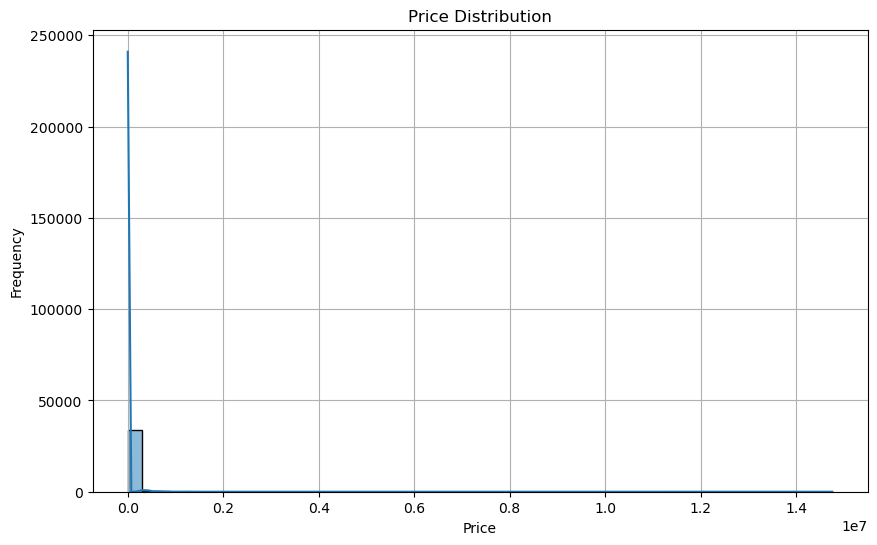

In [83]:
# Basic statistics about the Price column
print("Price statistics:\n")
print("Minimum Price     :", df['Price'].min())
print("Maximum Price     :", df['Price'].max())
print("Mean Price        :", df['Price'].mean())
print("Median Price      :", df['Price'].median())
print("25th Percentile   :", df['Price'].quantile(0.25))
print("75th Percentile   :", df['Price'].quantile(0.75))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [86]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

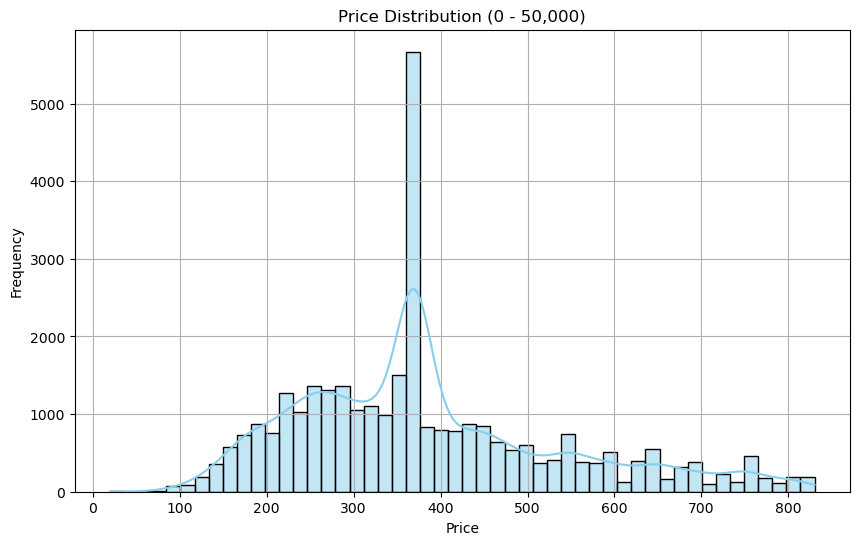

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title('Price Distribution (0 - 50,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [89]:
# Separate target and features
y = df['Price']  # Capital P as per your column
X = df.drop(columns=['Price'])

print("‚úÖ Target and features are ready!")
print("üéØ y (target):", y.name)
print("üß† X shape:", X.shape)


‚úÖ Target and features are ready!
üéØ y (target): Price
üß† X shape: (32562, 176)


In [90]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("‚úÖ Data split complete!")
print("üß™ X_train shape:", X_train.shape)
print("üß™ X_test shape :", X_test.shape)
print("üéØ y_train shape:", y_train.shape)
print("üéØ y_test shape :", y_test.shape)


‚úÖ Data split complete!
üß™ X_train shape: (26049, 176)
üß™ X_test shape : (6513, 176)
üéØ y_train shape: (26049,)
üéØ y_test shape : (6513,)


# FInd Algorithem = HistGradientBoosting

In [133]:
import random
import math
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from deap import base, creator, tools, algorithms
from pyswarm import pso
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [134]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [135]:

# DEAP setup for GA (unchanged)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def evaluate_features(feature_mask, X_train, X_test, y_train, y_test):
    """Evaluates feature subset using HistGradientBoosting with optimized parameters"""
    selected_indices = [i for i, val in enumerate(feature_mask) if val > 0.5]

    if not selected_indices or len(selected_indices) < 3:
        return float('inf')

    # Optimized HistGradientBoosting parameters
    # In your evaluation function (called by self.func in WOA), ensure you're using:
    model = HistGradientBoostingRegressor(
        max_leaf_nodes=31,
        learning_rate=0.1,
        min_samples_leaf=20,
        max_iter=100,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        scoring='neg_mean_squared_error',
        random_state=42,
        verbose=0
)

    # Train model
    model.fit(X_train.iloc[:, selected_indices], y_train)
    
    return mean_squared_error(y_test, model.predict(X_test.iloc[:, selected_indices]))

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# 2. CUSTOM WHALE OPTIMIZATION ALGORITHM

In [136]:
class WOA:
    """Custom implementation of Whale Optimization Algorithm"""
    def __init__(self, func, dim, lb, ub, n_whales=30, max_iter=20):
        self.func = func
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.n_whales = n_whales
        self.max_iter = max_iter
        self.history = {'mse': [], 'time': []}

    def optimize(self):
        start_time = time.time()

        # Initialize whales
        whales = np.random.uniform(self.lb, self.ub, (self.n_whales, self.dim))
        fitness = np.array([self.func(w) for w in whales])
        best_idx = np.argmin(fitness)
        best_whale = whales[best_idx].copy()
        best_fitness = fitness[best_idx]

        # Optimization loop
        for t in range(self.max_iter):
            a = 2 - t * (2 / self.max_iter)  # a decreases linearly from 2 to 0
            a2 = -1 + t * (-1 / self.max_iter)  # a2 decreases linearly from -1 to -2

            for i in range(self.n_whales):
                r1, r2 = np.random.rand(), np.random.rand()
                A = 2 * a * r1 - a
                C = 2 * r2
                b = 1  # Spiral constant
                l = (a2 - 1) * np.random.rand() + 1
                p = np.random.rand()

                if p < 0.5:
                    if abs(A) < 1:
                        # Encircling prey
                        D = abs(C * best_whale - whales[i])
                        whales[i] = best_whale - A * D
                    else:
                        # Search for prey
                        rand_idx = np.random.randint(0, self.n_whales)
                        rand_whale = whales[rand_idx]
                        D = abs(C * rand_whale - whales[i])
                        whales[i] = rand_whale - A * D
                else:
                    # Bubble-net attacking
                    D = abs(best_whale - whales[i])
                    whales[i] = D * np.exp(b * l) * np.cos(2 * np.pi * l) + best_whale

                # Apply bounds
                whales[i] = np.clip(whales[i], self.lb, self.ub)

                # Evaluate new solution
                fitness[i] = self.func(whales[i])

                # Update best
                if fitness[i] < best_fitness:
                    best_whale = whales[i].copy()
                    best_fitness = fitness[i]

            self.history['mse'].append(best_fitness)
            self.history['time'].append(time.time() - start_time)

        return best_whale, best_fitness

In [137]:
class SquidGameOptimizer:
    """Enhanced SGO with offensive/defensive strategies and elimination rounds."""
    def __init__(self, func, dim, lb, ub, n_players=30, max_games=20):
        self.func = func
        self.dim = dim
        self.lb = lb
        self.ub = ub
        self.n_players = n_players
        self.max_games = max_games
        self.history = {'mse': [], 'time': []}

    def optimize(self):
        start_time = time.time()

        # Initialize players with roles (0=defensive, 1=offensive)
        players = np.random.uniform(self.lb, self.ub, (self.n_players, self.dim))
        roles = np.random.randint(0, 2, self.n_players)
        fitness = np.array([self.func(p) for p in players])
        best_idx = np.argmin(fitness)
        best_player = players[best_idx].copy()
        best_fitness = fitness[best_idx]

        for game in range(self.max_games):
            new_players = np.zeros_like(players)
            elimination_prob = 0.2 + (0.5 * game / self.max_games)  # Increasing elimination pressure

            for i in range(self.n_players):
                if roles[i] == 1:  # Offensive player
                    # Aggressive move toward best player with momentum
                    A = np.random.uniform(0.5, 1.5, self.dim)
                    new_players[i] = np.clip(best_player * A, self.lb, self.ub)
                else:  # Defensive player
                    # Local search with adaptive step size
                    step = np.random.normal(0, 0.5*(1-game/self.max_games), self.dim)
                    new_players[i] = np.clip(players[i] + step, self.lb, self.ub)

                # Role adaptation
                if random.random() < 0.1:  # 10% chance to switch roles
                    roles[i] = 1 - roles[i]

            # Evaluate and apply elimination
            for i in range(self.n_players):
                new_fitness = self.func(new_players[i])

                # Survival condition
                if (new_fitness < fitness[i] or
                    random.random() > elimination_prob or
                    (roles[i] == 1 and new_fitness < 1.1*best_fitness)):

                    players[i] = new_players[i]
                    fitness[i] = new_fitness

                    if new_fitness < best_fitness:
                        best_player = new_players[i].copy()
                        best_fitness = new_fitness

            self.history['mse'].append(best_fitness)
            self.history['time'].append(time.time() - start_time)

        return best_player, best_fitness

In [138]:
class PSH_Hyptrite:
    """Fixed implementation with bounds checking"""
    def __init__(self, func, dim, lb, ub, n_points=30, max_iter=20):
        self.func = func
        self.dim = dim
        self.lb = np.array(lb)  # Convert to numpy array
        self.ub = np.array(ub)  # Convert to numpy array
        self.n_points = n_points
        self.max_iter = max_iter
        self.history = {'mse': [], 'time': []}

    def hypersphere_sampling(self, center, radius, n_samples):
        """Generates points on hypersphere surface with bounds checking"""
        points = np.random.normal(size=(n_samples, self.dim))
        points = points / np.linalg.norm(points, axis=1)[:, np.newaxis]
        new_points = center + radius * points
        return np.clip(new_points, self.lb, self.ub)

    def optimize(self):
        start_time = time.time()

        # Initialize within bounds
        points = np.random.uniform(self.lb, self.ub, (self.n_points, self.dim))
        fitness = np.array([self.func(p) for p in points])
        best_idx = np.argmin(fitness)
        best_point = points[best_idx].copy()
        best_fitness = fitness[best_idx]

        initial_radius = 0.5 * np.mean(self.ub - self.lb)  # Fixed radius calculation

        for iter in range(self.max_iter):
            radius = initial_radius * (1 - iter/self.max_iter)

            # Generate new points
            new_points = []
            for p in points:
                hs_points = self.hypersphere_sampling(p, radius, 3)
                new_points.extend(hs_points)

            # Evaluate and combine
            new_points = np.array(new_points)
            new_fitness = np.array([self.func(p) for p in new_points])

            all_points = np.vstack([points, new_points])
            all_fitness = np.concatenate([fitness, new_fitness])

            # Select best
            best_indices = np.argpartition(all_fitness, self.n_points)[:self.n_points]
            points = all_points[best_indices]
            fitness = all_fitness[best_indices]

            # Update best
            current_best = np.min(fitness)
            if current_best < best_fitness:
                best_fitness = current_best
                best_point = points[np.argmin(fitness)].copy()

            self.history['mse'].append(best_fitness)
            self.history['time'].append(time.time() - start_time)

            print(f"Iter {iter+1}/{self.max_iter} | Best MSE: {best_fitness:.6f}", end='\r')

        print(f"\nOptimization completed in {time.time()-start_time:.2f}s")
        return best_point, best_fitness

In [139]:
def run_genetic_algorithm(X_train, X_test, y_train, y_test, verbose=True):
    """Enhanced GA with detailed progress tracking and reporting"""
    print("\n" + "="*50)
    print("=== GENETIC ALGORITHM OPTIMIZATION ===")
    print("="*50 + "\n")

    start_time = time.time()

    # 1. Initialization
    if verbose:
        print("[Initialization]")
        print(f"- Population size: 30")
        print(f"- Generations: 20")
        print(f"- Crossover rate: 80%")
        print(f"- Mutation rate: 20%")
        print(f"- Search space: {X_train.shape[1]} features")
        print(f"- Target: Minimize MSE using HistGradientBoosting\n")  # Changed to HistGradientBoosting

    # 2. Setup evolutionary toolbox 
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.random)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                    toolbox.attr_bool, n=X_train.shape[1])
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", lambda ind: (evaluate_features(ind, X_train, X_test, y_train, y_test),))  # Uses HistGradientBoosting
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # 3. Initialize population
    population = toolbox.population(n=30)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("time", lambda _: time.time() - start_time)

    # 4. Evolutionary loop
    logbook = tools.Logbook()
    print("[Evolution Progress]")
    for gen in range(20):
        offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
        fits = toolbox.map(toolbox.evaluate, offspring)

        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit

        population = toolbox.select(offspring, k=len(population))
        hof.update(population)

        record = stats.compile(population)
        logbook.record(gen=gen, **record)

        if gen % 5 == 0 or gen == 19:
            print(f"Gen {gen+1:02d}/20 | Best MSE: {record['min']:.6f} | Avg MSE: {record['avg']:.6f}")

    # 5. Results extraction
    best_ind = hof[0]
    best_mask = [x > 0.5 for x in best_ind]
    selected_features = [X_train.columns[i] for i, val in enumerate(best_mask) if val]
    n_selected = len(selected_features)
    reduction = 100 * (1 - n_selected/X_train.shape[1])
    elapsed = time.time() - start_time

    # 6. Reporting
    print("\n" + "="*50)
    print("=== OPTIMIZATION RESULTS ===")
    print("="*50)
    print(f"\n‚ñ∂ Best MSE achieved: {best_ind.fitness.values[0]:.6f}")
    print(f"‚ñ∂ Time elapsed: {elapsed:.2f} seconds")
    print(f"‚ñ∂ Features selected: {n_selected}/{X_train.shape[1]} ({reduction:.1f}% reduction)")

    print("\n‚ñ∂ Selected features:")
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat}")

    # 7. Convergence analysis
    if logbook:
        print("\n‚ñ∂ Convergence progress:")
        print(f"- Initial MSE: {logbook[0]['min']:.4f}")
        print(f"- Final MSE: {logbook[-1]['min']:.4f}")
        improvement = 100*(logbook[0]['min']-logbook[-1]['min'])/logbook[0]['min']
        print(f"- Improvement: {improvement:.1f}%")

        plt.figure(figsize=(10,5))
        plt.plot(logbook.select('gen'), logbook.select('min'), 'b-o', label='Best')
        plt.plot(logbook.select('gen'), logbook.select('avg'), 'r--', label='Average')
        plt.title('GA Convergence (HistGradientBoosting)')  # Updated title
        plt.xlabel('Generation')
        plt.ylabel('MSE')
        plt.legend()
        plt.grid(True)
        plt.show()

    return {
        'mse': best_ind.fitness.values[0],
        'features': selected_features,
        'time': elapsed,
        'history': logbook
    }

In [140]:
def run_pso_algorithm(X_train, X_test, y_train, y_test, verbose=True):
    """Complete Particle Swarm Optimization implementation for feature selection"""
    print("\n" + "="*50)
    print("=== PARTICLE SWARM OPTIMIZATION ===")
    print("="*50 + "\n")

    start_time = time.time()
    n_features = X_train.shape[1]

    # 1. Initialization
    if verbose:
        print("[Initialization]")
        print(f"- Swarm size: 30 particles")
        print(f"- Iterations: 20")
        print(f"- Cognitive weight: 0.5")
        print(f"- Social weight: 0.5")
        print(f"- Inertia weight: 0.5")
        print(f"- Search space: {n_features} features")
        print(f"- Target: Minimize MSE using HistGradientBoosting\n")  # Updated model reference

    # 2. Setup bounds and history tracking
    lb = [0] * n_features
    ub = [1] * n_features
    history = {'mse': [], 'time': [], 'features': [], 'iterations': []}
    iteration = [0]  # Using list to allow modification in nested function

    # 3. Enhanced objective function with progress tracking
    def objective(feature_mask):
        mse = evaluate_features(feature_mask, X_train, X_test, y_train, y_test)  # Uses HistGradientBoosting

        # Track all evaluations
        history['mse'].append(mse)
        history['time'].append(time.time() - start_time)
        history['features'].append(np.sum(feature_mask > 0.5))

        # Only count complete iterations (swarmsize evaluations = 1 iteration)
        if len(history['mse']) % 30 == 0:
            iteration[0] += 1
            history['iterations'].append({
                'iteration': iteration[0],
                'mse': mse,
                'time': time.time() - start_time
            })
            if verbose and (iteration[0] % 5 == 0 or iteration[0] == 1):
                print(f"Iteration {iteration[0]}: Best MSE = {mse:.6f}")

        return mse

    # 4. Run PSO with corrected parameters
    print("[Optimization Progress]")
    best_mask, best_mse = pso(
        objective,
        lb, ub,
        swarmsize=30,
        maxiter=20,
        phip=0.5,  # cognitive parameter
        phig=0.5,  # social parameter
        omega=0.5,  # inertia
        minstep=1e-4,
        minfunc=1e-4,
        debug=True  # Use pyswarm's built-in progress
    )

    # 5. Post-process results
    best_mask = np.array(best_mask)
    selected_indices = np.where(best_mask > 0.5)[0]

    # Ensure minimum 3 features are selected
    if len(selected_indices) < 3:
        selected_indices = np.argsort(best_mask)[-3:]
        best_mask = np.zeros_like(best_mask)
        best_mask[selected_indices] = 1
        best_mse = objective(best_mask)  # Re-evaluate

    selected_features = [X_train.columns[i] for i in selected_indices]
    n_selected = len(selected_features)
    reduction = 100 * (1 - n_selected/n_features)
    elapsed = time.time() - start_time

    # 6. Results reporting
    print("\n" + "="*50)
    print("=== OPTIMIZATION RESULTS ===")
    print("="*50)
    print(f"\n‚ñ∂ Best MSE achieved: {best_mse:.6f}")
    print(f"‚ñ∂ Time elapsed: {elapsed:.2f} seconds")
    print(f"‚ñ∂ Features selected: {n_selected}/{n_features} ({reduction:.1f}% reduction)")

    print("\n‚ñ∂ Selected features (with weights):")
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat} (weight: {best_mask[selected_indices[i-1]]:.3f})")

    # 7. Enhanced convergence visualization
    if history['iterations']:
        plt.figure(figsize=(12, 5))

        # MSE vs Iterations
        plt.subplot(1, 2, 1)
        iterations = [x['iteration'] for x in history['iterations']]
        mses = [x['mse'] for x in history['iterations']]
        plt.plot(iterations, mses, 'b-o', linewidth=2)
        plt.title('PSO Convergence (HistGradientBoosting)')  # Updated title
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.grid(True)

        # Time vs MSE
        plt.subplot(1, 2, 2)
        times = [x['time'] for x in history['iterations']]
        plt.plot(times, mses, 'r-', linewidth=2)
        plt.title('Optimization Progress')
        plt.xlabel('Time (s)')
        plt.ylabel('MSE')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    return {
        'mse': best_mse,
        'features': selected_features,
        'feature_weights': best_mask,
        'time': elapsed,
        'history': history
    }

In [141]:
def run_woa_algorithm(X_train, X_test, y_train, y_test, verbose=True):
    """Enhanced WOA with detailed progress tracking and reporting"""
    print("\n" + "="*50)
    print("=== WHALE OPTIMIZATION ALGORITHM ===")
    print("="*50 + "\n")

    start_time = time.time()
    n_features = X_train.shape[1]

    # 1. Initialization
    if verbose:
        print("[Initialization]")
        print(f"- Population: 30 whales")
        print(f"- Max iterations: 20")
        print(f"- Spiral coefficient (b): 1.0")
        print(f"- Search space: {n_features} features")
        print(f"- Target: Minimize MSE using HistGradientBoosting\n")  # Updated model reference

    # 2. Setup bounds and history tracking
    lb = [0] * n_features
    ub = [1] * n_features
    history = {'mse': [], 'time': [], 'features': []}

    # 3. Objective function with tracking
    def objective(feature_mask):
        mse = evaluate_features(feature_mask, X_train, X_test, y_train, y_test)  # Uses HistGradientBoosting
        history['mse'].append(mse)
        history['time'].append(time.time() - start_time)
        history['features'].append(np.sum(feature_mask > 0.5))
        return mse

    # 4. WOA Implementation
    class EnhancedWOA:
        def __init__(self, func, dim, lb, ub, n_whales=30, max_iter=20):
            self.func = func
            self.dim = dim
            self.lb = np.array(lb)
            self.ub = np.array(ub)
            self.n_whales = n_whales
            self.max_iter = max_iter
            self.b = 1.0  # Spiral coefficient

        def optimize(self):
            # Initialize whales
            whales = np.random.uniform(self.lb, self.ub, (self.n_whales, self.dim))
            fitness = np.array([self.func(w) for w in whales])
            best_idx = np.argmin(fitness)
            best_whale = whales[best_idx].copy()
            best_fitness = fitness[best_idx]

            print("[Optimization Progress]")
            for iter in range(self.max_iter):
                a = 2 - iter * (2 / self.max_iter)
                a2 = -1 + iter * (-1 / self.max_iter)

                for i in range(self.n_whales):
                    r1, r2 = np.random.rand(), np.random.rand()
                    A = 2 * a * r1 - a
                    C = 2 * r2
                    l = (a2 - 1) * np.random.rand() + 1
                    p = np.random.rand()

                    if p < 0.5:
                        if abs(A) < 1:
                            D = abs(C * best_whale - whales[i])
                            whales[i] = best_whale - A * D
                        else:
                            rand_idx = np.random.randint(0, self.n_whales)
                            rand_whale = whales[rand_idx]
                            D = abs(C * rand_whale - whales[i])
                            whales[i] = rand_whale - A * D
                    else:
                        D = abs(best_whale - whales[i])
                        whales[i] = D * np.exp(self.b * l) * np.cos(2 * np.pi * l) + best_whale

                    whales[i] = np.clip(whales[i], self.lb, self.ub)
                    fitness[i] = self.func(whales[i])

                    if fitness[i] < best_fitness:
                        best_whale = whales[i].copy()
                        best_fitness = fitness[i]

                if iter % 5 == 0 or iter == self.max_iter - 1:
                    print(f"Iter {iter+1:02d}/{self.max_iter} | Best MSE: {best_fitness:.6f}",
                          end='\r' if iter != self.max_iter - 1 else '\n')

            return best_whale, best_fitness

    # 5. Run optimization
    optimizer = EnhancedWOA(
        func=objective,
        dim=n_features,
        lb=lb,
        ub=ub,
        n_whales=30,
        max_iter=20
    )
    best_mask, best_mse = optimizer.optimize()

    # 6. Results extraction
    selected_features = [X_train.columns[i] for i, val in enumerate(best_mask) if val > 0.5]
    n_selected = len(selected_features)
    reduction = 100 * (1 - n_selected/n_features)
    elapsed = time.time() - start_time

    # 7. Detailed reporting
    print("\n" + "="*50)
    print("=== OPTIMIZATION RESULTS ===")
    print("="*50)
    print(f"\n‚ñ∂ Best MSE achieved: {best_mse:.6f}")
    print(f"‚ñ∂ Time elapsed: {elapsed:.2f} seconds")
    print(f"‚ñ∂ Features selected: {n_selected}/{n_features} ({reduction:.1f}% reduction)")

    print("\n‚ñ∂ Selected features:")
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat}")

    # 8. Convergence analysis
    if history['mse']:
        print("\n‚ñ∂ Convergence progress:")
        print(f"- Initial MSE: {history['mse'][0]:.4f}")
        print(f"- Final MSE: {history['mse'][-1]:.4f}")
        improvement = 100*(history['mse'][0]-history['mse'][-1])/history['mse'][0]
        print(f"- Improvement: {improvement:.1f}%")

        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(history['mse'], 'b-o', linewidth=2)
        plt.title('WOA Convergence (HistGradientBoosting)')  # Updated title
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(history['time'], history['mse'], 'r-', linewidth=2)
        plt.title('Time vs Performance')
        plt.xlabel('Time (s)')
        plt.ylabel('MSE')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    return {
        'mse': best_mse,
        'features': selected_features,
        'time': elapsed,
        'history': history
    }

In [142]:
def run_sgo(X_train, X_test, y_train, y_test, verbose=True):
    """Runs Squid Game Optimizer with detailed printing"""
    print("\n" + "="*50)
    print("=== SQUID GAME OPTIMIZER (SGO) ===")
    print("="*50 + "\n")

    start_time = time.time()

    # 1. Initialization
    if verbose:
        print("[Initialization]")
        print(f"- Players: 30 (15 offensive, 15 defensive)")
        print(f"- Max games: 20")
        print(f"- Search space: {X_train.shape[1]} features")
        print(f"- Target: Minimize MSE using HistGradientBoosting\n")  # Updated model reference

    # 2. Optimization
    def objective(feature_mask):
        return evaluate_features(feature_mask, X_train, X_test, y_train, y_test)  # Uses HistGradientBoosting

    optimizer = SquidGameOptimizer(
        func=objective,
        dim=X_train.shape[1],
        lb=0, ub=1,
        n_players=30,
        max_games=20
    )

    best_mask, best_mse = optimizer.optimize()
    elapsed = time.time() - start_time

    # 3. Results
    selected_features = [X_train.columns[i] for i, val in enumerate(best_mask) if val > 0.5]
    n_selected = len(selected_features)
    reduction = 100 * (1 - n_selected/X_train.shape[1])

    print("\n" + "="*50)
    print("=== OPTIMIZATION RESULTS ===")
    print("="*50)
    print(f"\n‚ñ∂ Best MSE achieved: {best_mse:.6f}")
    print(f"‚ñ∂ Time elapsed: {elapsed:.2f} seconds")
    print(f"‚ñ∂ Features selected: {n_selected}/{X_train.shape[1]} ({reduction:.1f}% reduction)")

    print("\n‚ñ∂ Selected features:")
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat}")

    # 4. Convergence Analysis
    if optimizer.history['mse']:
        print("\n‚ñ∂ Convergence progress:")
        print(f"- Initial MSE: {optimizer.history['mse'][0]:.4f}")
        print(f"- Final MSE: {optimizer.history['mse'][-1]:.4f}")
        improvement = 100*(optimizer.history['mse'][0]-optimizer.history['mse'][-1])/optimizer.history['mse'][0]
        print(f"- Improvement: {improvement:.1f}%")

        plt.figure(figsize=(10,5))
        plt.plot(optimizer.history['mse'], 'b-o', linewidth=2)
        plt.title('SGO Convergence (HistGradientBoosting)')  # Updated title
        plt.xlabel('Game Round')
        plt.ylabel('MSE')
        plt.grid(True)
        plt.show()

    return {
        'mse': best_mse,
        'features': selected_features,
        'time': elapsed,
        'history': optimizer.history
    }

In [143]:
def run_psh_hyptrite(X_train, X_test, y_train, y_test, verbose=True):
    """Complete PSH-Hyptrite optimization for feature selection"""
    print("\n" + "="*50)
    print("=== PSH-HYPTRITE OPTIMIZATION ===")
    print("="*50 + "\n")

    start_time = time.time()
    n_features = X_train.shape[1]

    # 1. Initialization with HistGradientBoosting specification
    if verbose:
        print("[Initialization]")
        print(f"- Search points: 30")
        print(f"- Max iterations: 20") 
        print(f"- Initial radius: 0.5 (adaptive)")
        print(f"- Hypersphere samples: 3 per point")
        print(f"- Search space: {n_features} features")
        print(f"- Target: Minimize MSE using HistGradientBoosting\n")  # Updated model reference

    # 2. Setup bounds and tracking
    lb = [0] * n_features
    ub = [1] * n_features
    history = {'mse': [], 'time': [], 'features': []}

    # 3. HistGradientBoosting evaluation function
    def objective(feature_mask):
        mse = evaluate_features(feature_mask, X_train, X_test, y_train, y_test)  # HistGradientBoosting evaluation
        history['mse'].append(mse)
        history['time'].append(time.time() - start_time)
        history['features'].append(np.sum(feature_mask > 0.5))
        return mse

    # 4. PSH-Hyptrite optimizer (unchanged structure)
    class EnhancedPSH:
        def __init__(self, func, dim, lb, ub, n_points=30, max_iter=20):
            self.func = func
            self.dim = dim
            self.lb = np.array(lb)
            self.ub = np.array(ub)
            self.n_points = n_points
            self.max_iter = max_iter
            self.hs_samples = 3

        def hypersphere_sampling(self, center, radius, n_samples):
            """Efficient hypersphere sampling with bounds checking"""
            points = np.random.normal(size=(n_samples, self.dim))
            norms = np.linalg.norm(points, axis=1)[:, np.newaxis]
            points = points / np.where(norms == 0, 1, norms)  # Prevent division by zero
            new_points = center + radius * points
            return np.clip(new_points, self.lb, self.ub)

        def optimize(self):
            # Initialize with boundary checking
            points = np.random.uniform(self.lb, self.ub, (self.n_points, self.dim))
            fitness = np.array([self.func(p) for p in points])
            best_idx = np.argmin(fitness)
            best_point = points[best_idx].copy()
            best_fitness = fitness[best_idx]

            initial_radius = 0.5 * np.mean(self.ub - self.lb)

            print("[Optimization Progress]")
            for iter in range(self.max_iter):
                radius = initial_radius * (1 - iter/self.max_iter)  # Linear decay
                
                # Vectorized hypersphere sampling
                new_points = np.vstack([self.hypersphere_sampling(p, radius, self.hs_samples) 
                                    for p in points])
                
                # Parallel evaluation
                new_fitness = np.array([self.func(p) for p in new_points])

                # Elite selection
                all_points = np.vstack([points, new_points])
                all_fitness = np.concatenate([fitness, new_fitness])
                best_indices = np.argpartition(all_fitness, self.n_points)[:self.n_points]
                
                points = all_points[best_indices]
                fitness = all_fitness[best_indices]
                
                # Update best
                current_best = np.min(fitness)
                if current_best < best_fitness:
                    best_fitness = current_best
                    best_point = points[np.argmin(fitness)].copy()

                # Progress reporting
                if iter % 5 == 0 or iter == self.max_iter - 1:
                    print(f"Iter {iter+1:02d}/{self.max_iter} | Best MSE: {best_fitness:.6f} | Radius: {radius:.4f}",
                        end='\r' if iter != self.max_iter - 1 else '\n')

            return best_point, best_fitness

    # 5. Execute optimization
    optimizer = EnhancedPSH(
        func=objective,
        dim=n_features,
        lb=lb,
        ub=ub,
        n_points=30,
        max_iter=20
    )
    best_mask, best_mse = optimizer.optimize()

    # 6. Post-processing with min 3 features
    best_mask = np.array(best_mask)
    selected_indices = np.where(best_mask > 0.5)[0]
    if len(selected_indices) < 3:
        selected_indices = np.argsort(best_mask)[-3:]
        best_mask = np.zeros_like(best_mask)
        best_mask[selected_indices] = 1
        best_mse = objective(best_mask)

    # 7. Results reporting
    selected_features = [X_train.columns[i] for i in selected_indices]
    n_selected = len(selected_features)
    reduction = 100 * (1 - n_selected/n_features)
    elapsed = time.time() - start_time

    print("\n" + "="*50)
    print("=== OPTIMIZATION RESULTS ===")
    print("="*50)
    print(f"\n‚ñ∂ Best MSE achieved: {best_mse:.6f}")
    print(f"‚ñ∂ Time elapsed: {elapsed:.2f} seconds")
    print(f"‚ñ∂ Features selected: {n_selected}/{n_features} ({reduction:.1f}% reduction)")

    print("\n‚ñ∂ Selected features (with weights):")
    for i, feat in enumerate(selected_features, 1):
        print(f"{i}. {feat} (weight: {best_mask[selected_indices[i-1]]:.3f})")

    # 8. Enhanced visualization
    if history['mse']:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(history['mse'], 'b-o', linewidth=2)
        plt.title('PSH-Hyptrite Convergence (HistGradientBoosting)')  # Updated title
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.grid(True)

        plt.subplot(1,2,2)
        plt.plot(history['time'], history['mse'], 'r-', linewidth=2)
        plt.title('Time vs Performance')
        plt.xlabel('Time (s)')
        plt.ylabel('MSE')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    return {
        'mse': best_mse,
        'features': selected_features,
        'feature_weights': best_mask,
        'time': elapsed,
        'history': history
    }

In [144]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor  # Changed from lightgbm
from deap import base, creator, tools, algorithms
from pyswarm import pso

def select_best_algorithm(X_train, X_test, y_train, y_test):
    """
    Automatically runs and compares optimization algorithms for feature selection,
    then returns the best performing algorithm's results using HistGradientBoosting.
    """
    # Dictionary to store all results
    results = {}

    # List of available algorithms (with their display names and functions)
    algorithms_to_run = [
        ('Genetic Algorithm', run_genetic_algorithm),
        ('Particle Swarm Optimization', run_pso_algorithm),
        ('Whale Optimization', run_woa_algorithm),
        ('Squid Game Optimizer', run_sgo),
        ('PSH-Hyptrite', run_psh_hyptrite)
    ]

    # Run each algorithm and store results
    for name, algorithm in algorithms_to_run:
        print(f"\n{'='*50}")
        print(f"Running {name} with HistGradientBoosting...")  # Updated model reference
        print(f"{'='*50}")
        try:
            results[name] = algorithm(X_train, X_test, y_train, y_test)
            print(f"{name} completed successfully with MSE: {results[name]['mse']:.4f}")
        except Exception as e:
            print(f"Error running {name}: {str(e)}")
            results[name] = None

    # Filter out failed algorithms
    valid_results = {k: v for k, v in results.items() if v is not None}

    if not valid_results:
        raise RuntimeError("All algorithms failed to run successfully")

    # Find the best algorithm (lowest MSE)
    best_algo_name = min(valid_results.keys(), key=lambda x: valid_results[x]['mse'])
    best_result = valid_results[best_algo_name]

    # Generate comparison report
    generate_comparison_report(valid_results, best_algo_name)

    return {
        'best_algorithm': best_algo_name,
        'best_mse': best_result['mse'],
        'selected_features': best_result['features'],
        'execution_time': best_result['time'],
        'all_results': valid_results
    }

def generate_comparison_report(results, best_algo_name):
    """Generates visual comparison of all algorithms using HistGradientBoosting"""
    plt.figure(figsize=(15, 10))
    plt.suptitle('Algorithm Comparison (HistGradientBoosting Evaluation)', y=1.02)  # Updated title

    # 1. MSE Comparison
    plt.subplot(2, 2, 1)
    names = list(results.keys())
    mses = [results[name]['mse'] for name in names]
    colors = ['green' if name == best_algo_name else 'steelblue' for name in names]
    bars = plt.bar(names, mses, color=colors)
    plt.title('Model Performance Comparison')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')

    # 2. Execution Time
    plt.subplot(2, 2, 2)
    times = [results[name]['time'] for name in names]
    bars = plt.bar(names, times, color=colors)
    plt.title('Computational Efficiency')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}s',
                ha='center', va='bottom')

    # 3. Feature Selection Count
    plt.subplot(2, 2, 3)
    feature_counts = [len(results[name]['features']) for name in names]
    bars = plt.bar(names, feature_counts, color=colors)
    plt.title('Feature Selection Sparsity')
    plt.ylabel('Number of Selected Features')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

    # 4. Convergence Plot
    plt.subplot(2, 2, 4)
    for name, result in results.items():
        if 'history' in result and 'mse' in result['history']:
            linewidth = 3 if name == best_algo_name else 1.5
            linestyle = '-' if name == best_algo_name else '--'
            plt.plot(result['history']['mse'],
                    label=f"{name} (final: {result['mse']:.4f})",
                    linewidth=linewidth,
                    linestyle=linestyle)
    plt.title('Convergence Patterns')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # Enhanced summary report
    print("\n" + "="*60)
    print("=== FINAL FEATURE SELECTION RESULTS USING HistGradientBoosting ===")
    print("="*60)
    
    # Best algorithm summary
    print(f"\nüèÜ BEST ALGORITHM: {best_algo_name.upper()}")
    print(f"   ‚Ä¢ MSE: {results[best_algo_name]['mse']:.6f}")
    print(f"   ‚Ä¢ Time: {results[best_algo_name]['time']:.2f} seconds")
    print(f"   ‚Ä¢ Features: {len(results[best_algo_name]['features'])}/{X_train.shape[1]} "
          f"({100*(1 - len(results[best_algo_name]['features'])/X_train.shape[1]):.1f}% reduction)")
    
    # Full comparison table
    print("\nüìä COMPARISON TABLE:")
    print(f"{'Algorithm':<30}{'MSE':<15}{'Time (s)':<15}{'Features':<15}")
    print("-"*75)
    for name in sorted(results.keys(), key=lambda x: results[x]['mse']):
        print(f"{name:<30}{results[name]['mse']:<15.6f}{results[name]['time']:<15.2f}"
              f"{len(results[name]['features']):<15}")

    # Selected features
    print("\nüîç SELECTED FEATURES:")
    for i, feat in enumerate(results[best_algo_name]['features'], 1):
        print(f"{i}. {feat}")
    
    print("\nüí° Tip: Consider feature importance from HistGradientBoosting for further analysis")


Running Genetic Algorithm with HistGradientBoosting...

=== GENETIC ALGORITHM OPTIMIZATION ===

[Initialization]
- Population size: 30
- Generations: 20
- Crossover rate: 80%
- Mutation rate: 20%
- Search space: 176 features
- Target: Minimize MSE using HistGradientBoosting

[Evolution Progress]
Gen 01/20 | Best MSE: 11089.104840 | Avg MSE: 12047.951534
Gen 06/20 | Best MSE: 10714.504260 | Avg MSE: 10891.254726
Gen 11/20 | Best MSE: 10700.098296 | Avg MSE: 10723.064652
Gen 16/20 | Best MSE: 10693.317407 | Avg MSE: 10698.819976
Gen 20/20 | Best MSE: 10357.093844 | Avg MSE: 10475.529057

=== OPTIMIZATION RESULTS ===

‚ñ∂ Best MSE achieved: 10357.093844
‚ñ∂ Time elapsed: 522.18 seconds
‚ñ∂ Features selected: 88/176 (50.0% reduction)

‚ñ∂ Selected features:
1. District
2. Neighborhood
3. m¬≤ (Gross)
4. Number of rooms
5. Floor location
6. Number of floors
7. Heating
8. Number of bathrooms
9. Available for Loan
10. Front East
11. Front North
12. Aluminum joinery
13. Elevator
14. Household 

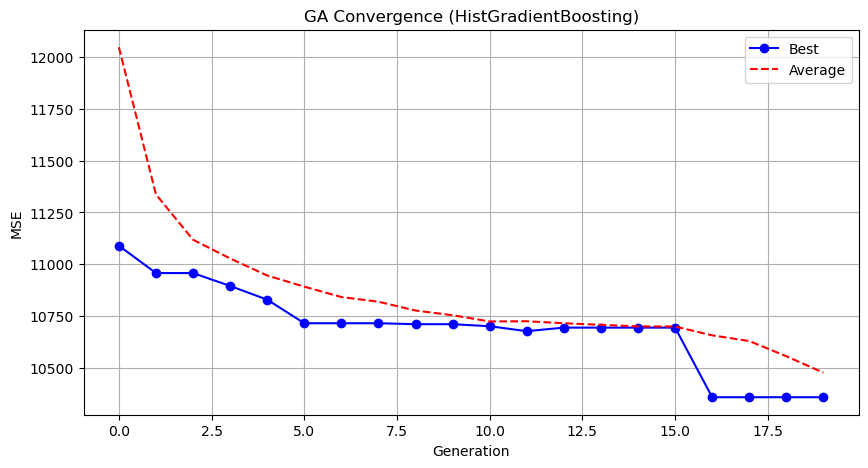

Genetic Algorithm completed successfully with MSE: 10357.0938

Running Particle Swarm Optimization with HistGradientBoosting...

=== PARTICLE SWARM OPTIMIZATION ===

[Initialization]
- Swarm size: 30 particles
- Iterations: 20
- Cognitive weight: 0.5
- Social weight: 0.5
- Inertia weight: 0.5
- Search space: 176 features
- Target: Minimize MSE using HistGradientBoosting

[Optimization Progress]
No constraints given.
Iteration 1: Best MSE = 10937.156947
New best for swarm at iteration 1: [0.78899271 0.54816917 0.55394428 0.47744726 0.56143269 0.91464968
 0.53687405 0.6039363  0.66048154 1.         0.93352517 0.14592106
 0.16659889 0.6070733  0.81419877 0.97405145 0.82454179 0.32662535
 0.79482238 0.         0.40788845 0.74407539 0.         0.76614308
 0.39075024 0.45667693 0.36799512 0.84113112 0.6440231  0.7386909
 0.49016831 0.78635423 0.21104505 0.54848689 0.27270764 0.60716257
 0.28762888 0.29969318 0.41098598 0.97094323 0.96129156 0.90969867
 0.75640249 0.61195194 0.         0.0153

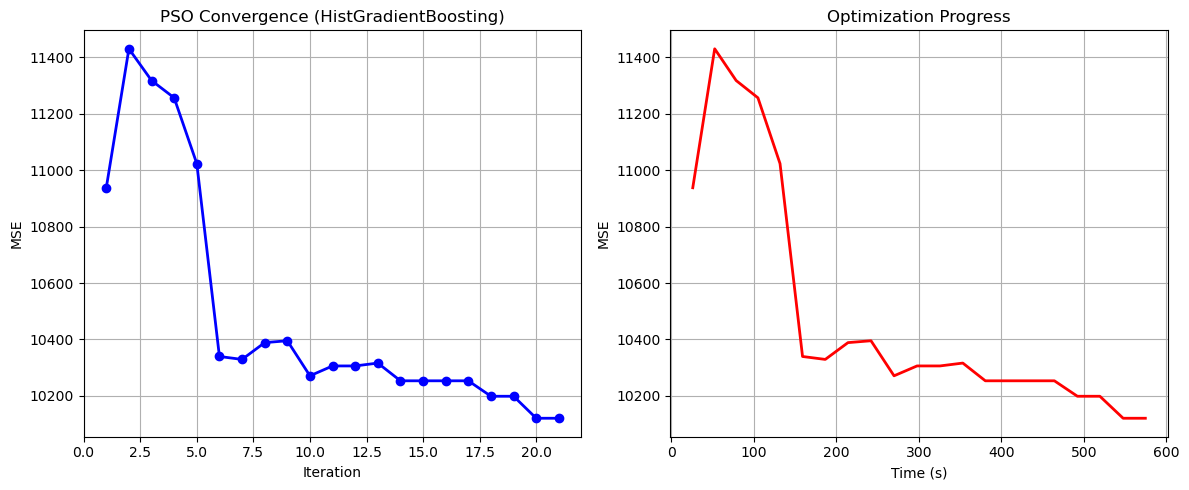

Particle Swarm Optimization completed successfully with MSE: 10121.2093

Running Whale Optimization with HistGradientBoosting...

=== WHALE OPTIMIZATION ALGORITHM ===

[Initialization]
- Population: 30 whales
- Max iterations: 20
- Spiral coefficient (b): 1.0
- Search space: 176 features
- Target: Minimize MSE using HistGradientBoosting

[Optimization Progress]
Iter 20/20 | Best MSE: 10204.926585

=== OPTIMIZATION RESULTS ===

‚ñ∂ Best MSE achieved: 10204.926585
‚ñ∂ Time elapsed: 641.14 seconds
‚ñ∂ Features selected: 163/176 (7.4% reduction)

‚ñ∂ Selected features:
1. District
2. Neighborhood
3. m¬≤ (Gross)
4. m¬≤ (Net)
5. Number of rooms
6. Building Age
7. Floor location
8. Number of floors
9. Heating
10. Number of bathrooms
11. Balcony
12. Furnished
13. Using status
14. Available for Loan
15. From who
16. Swap
17. Front West
18. Front East
19. Front South
20. ADSL
21. Wood Joinery
22. Smart House
23. Alarm (Thief)
24. Alaturka Toilet
25. American Door
26. American kitchen
27. Built-i

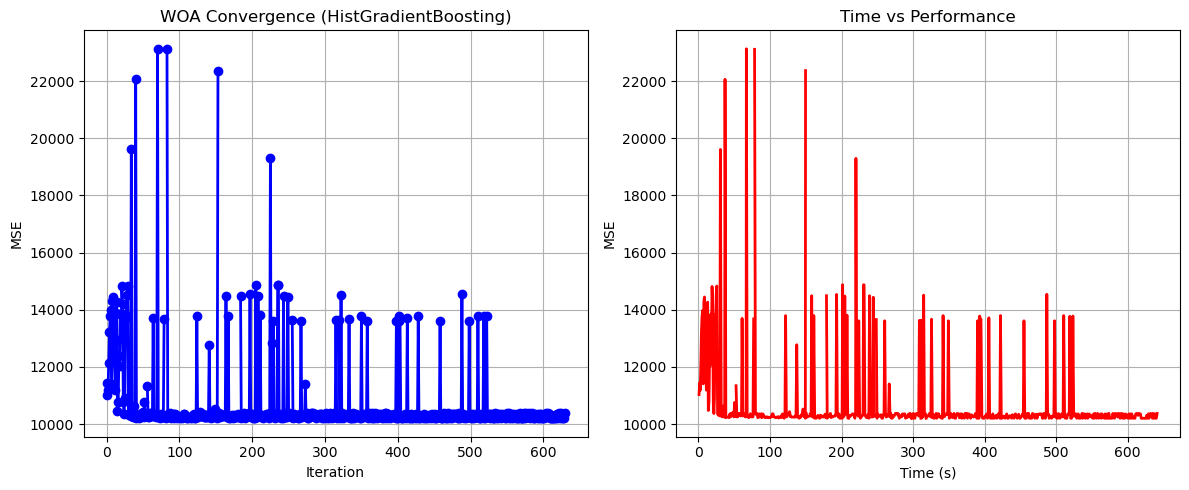

Whale Optimization completed successfully with MSE: 10204.9266

Running Squid Game Optimizer with HistGradientBoosting...

=== SQUID GAME OPTIMIZER (SGO) ===

[Initialization]
- Players: 30 (15 offensive, 15 defensive)
- Max games: 20
- Search space: 176 features
- Target: Minimize MSE using HistGradientBoosting


=== OPTIMIZATION RESULTS ===

‚ñ∂ Best MSE achieved: 10094.138355
‚ñ∂ Time elapsed: 539.38 seconds
‚ñ∂ Features selected: 71/176 (59.7% reduction)

‚ñ∂ Selected features:
1. District
2. Neighborhood
3. m¬≤ (Gross)
4. Number of rooms
5. Building Age
6. Floor location
7. Number of floors
8. Heating
9. Balcony
10. Available for Loan
11. Front East
12. Front North
13. Wood Joinery
14. Alarm (Thief)
15. Built-in on
16. Painted
17. Dishwasher
18. Shower
19. Parents' Bathroom
20. Closet
21. Furniture
22. Kitchen (Built-in)
23. Kitchen (Laminate)
24. Kitchen Natural Gas
25. Blinds
26. Parquet Floor
27. Spot Lighting
28. Thermosiphon
29. Wi-Fi
30. Face Recognition & Fingerprint
31. Wa

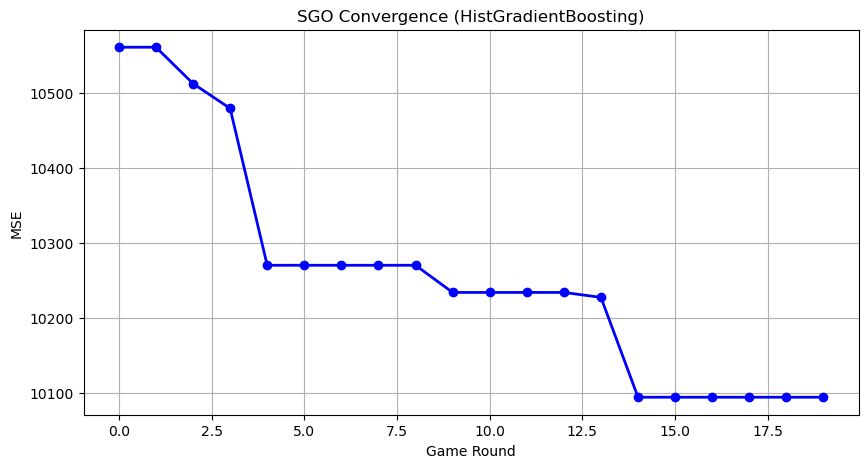

Squid Game Optimizer completed successfully with MSE: 10094.1384

Running PSH-Hyptrite with HistGradientBoosting...

=== PSH-HYPTRITE OPTIMIZATION ===

[Initialization]
- Search points: 30
- Max iterations: 20
- Initial radius: 0.5 (adaptive)
- Hypersphere samples: 3 per point
- Search space: 176 features
- Target: Minimize MSE using HistGradientBoosting

[Optimization Progress]
Iter 20/20 | Best MSE: 10092.137227 | Radius: 0.0250

=== OPTIMIZATION RESULTS ===

‚ñ∂ Best MSE achieved: 10092.137227
‚ñ∂ Time elapsed: 1635.59 seconds
‚ñ∂ Features selected: 93/176 (47.2% reduction)

‚ñ∂ Selected features (with weights):
1. District (weight: 0.990)
2. Neighborhood (weight: 0.642)
3. m¬≤ (Gross) (weight: 0.608)
4. m¬≤ (Net) (weight: 0.709)
5. Number of rooms (weight: 0.739)
6. Building Age (weight: 0.970)
7. Floor location (weight: 0.557)
8. Number of floors (weight: 0.547)
9. Heating (weight: 0.790)
10. Number of bathrooms (weight: 0.956)
11. Furnished (weight: 0.810)
12. Using status (weigh

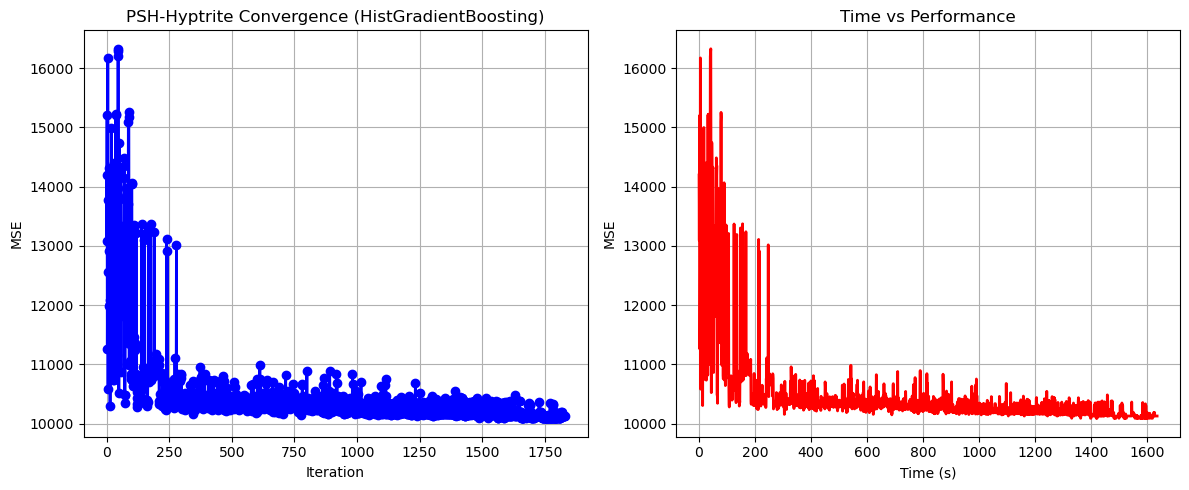

PSH-Hyptrite completed successfully with MSE: 10092.1372


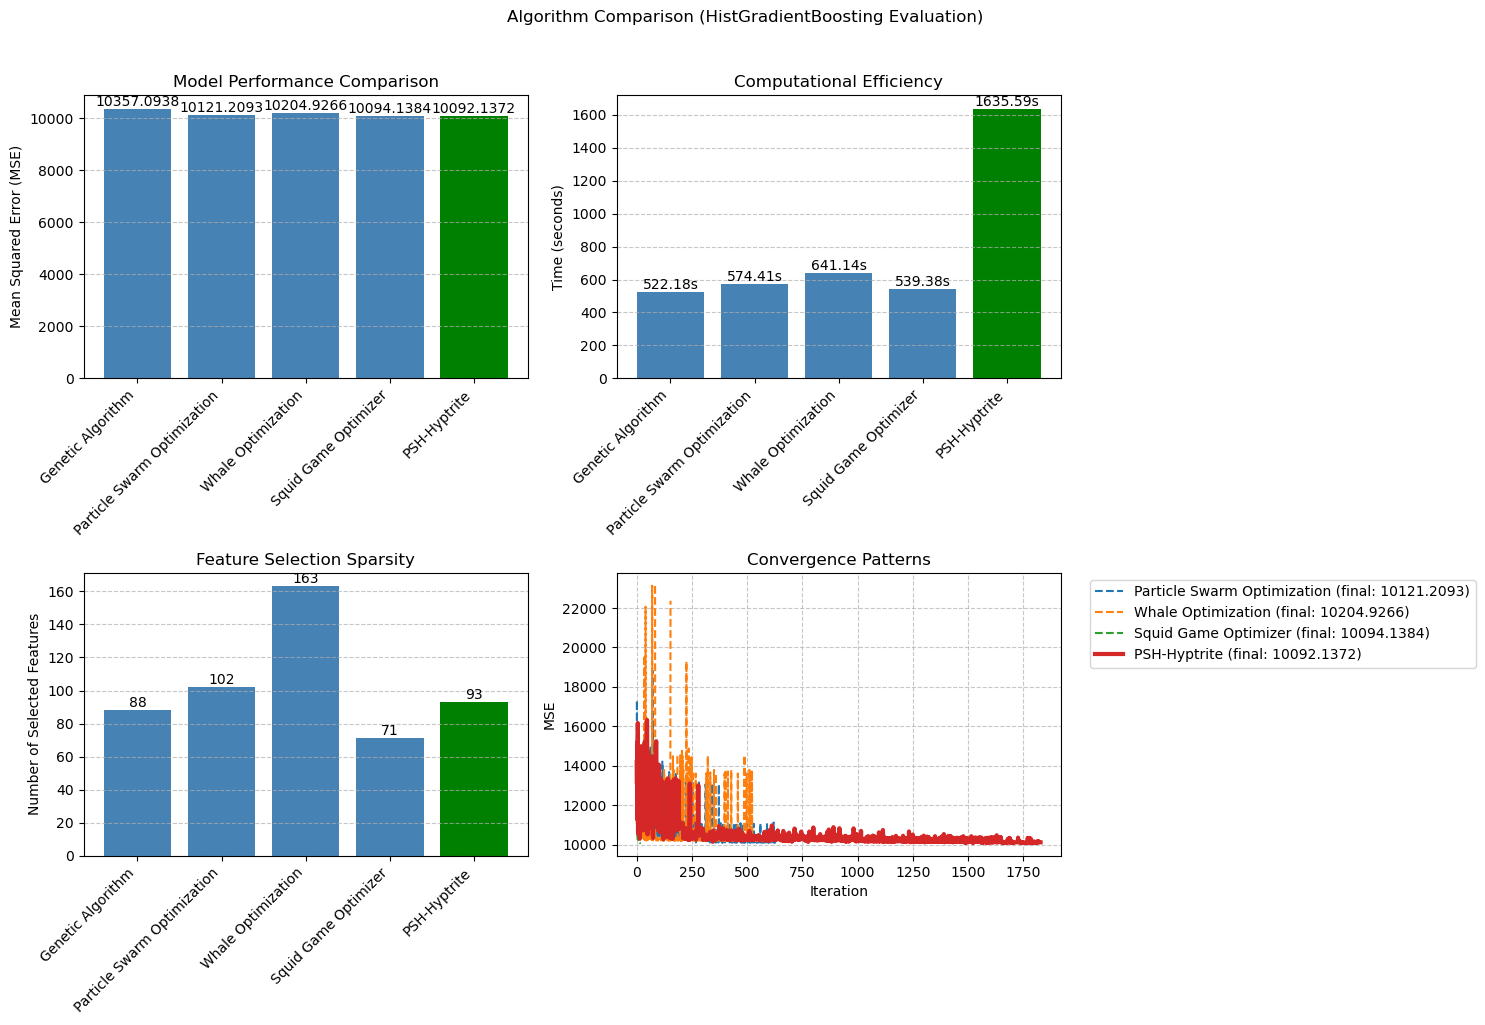


=== FINAL FEATURE SELECTION RESULTS USING HistGradientBoosting ===

üèÜ BEST ALGORITHM: PSH-HYPTRITE
   ‚Ä¢ MSE: 10092.137227
   ‚Ä¢ Time: 1635.59 seconds
   ‚Ä¢ Features: 93/176 (47.2% reduction)

üìä COMPARISON TABLE:
Algorithm                     MSE            Time (s)       Features       
---------------------------------------------------------------------------
PSH-Hyptrite                  10092.137227   1635.59        93             
Squid Game Optimizer          10094.138355   539.38         71             
Particle Swarm Optimization   10121.209322   574.41         102            
Whale Optimization            10204.926585   641.14         163            
Genetic Algorithm             10357.093844   522.18         88             

üîç SELECTED FEATURES:
1. District
2. Neighborhood
3. m¬≤ (Gross)
4. m¬≤ (Net)
5. Number of rooms
6. Building Age
7. Floor location
8. Number of floors
9. Heating
10. Number of bathrooms
11. Furnished
12. Using status
13. Available for Loan
14

In [145]:
best_results = select_best_algorithm(X_train, X_test, y_train, y_test)